# CHAPTER 2. 자연어와 단어의 분산 표현
# 2.1 자연어 처리란?

**NLP(Natural Language Processing)**
자연어를 처리하는 분야 = 우리의 말을 컴퓨터에게 이해시키기 위한 기술(분야)

- 시소러스를 활용한 기법
- 통계 기반 기법
- 추론 기반 기법(word2vec)

# 2.2 시소러스
시소러스란 기본적으로 유의어 사전으로, 뜻이 같은 단어(동의어)나 뜻이 비슷한 단어(유의어)가 한 그룹으로 분류되어 있다.
또한 자연어 처리에 이용되는 시소러스에는 단어 사이의 '상위와 하위' '전체와 부분' 등 더 세세한 관계까지 그래프 구조로 정의한다.

WordNet과 같은 시소러스에는 수많은 단어에 대한 동의어와 계층 구조 등의 관계가 정의돼 있다. 그리고 이 지식을 이용하면 '단어의 의미'를 간접적으로라도 컴퓨터에 전달할 수 있다. 하지만 이처럼 사람이 수작업으로 레이블링하는 방식에는 크나큰 결점이 존재한다. 다음은 시소러스 방식의 대표적인 문제점이다.

1. 시대 변화에 대응하기 어렵다.
(시대 변화에 대응하려면 시소러스를 사람이 수작업으로 끊임없이 갱신해야 한다)
2. 사람을 쓰는 비용이 크다.
(시소러스를 만드는 데 엄청난 인적 비용이 발생한다. 현존하는 영어 단어의 수는 1,000만개가 넘고 이상적으로는 이 방대한 단어들 모두에 대해 단어 사이의 관계를 정의해줘야 한다.)
3. 단어의 미묘한 차이를 표현할 수 없다.
(실제로 비슷한 단어들이라도 미묘한 차이를 표현할 수 없다.)

이러한 문제를 피하기 위해 '통계 기반 기법' 과 신경망을 사용한 '추론 기반 기법'을 알아본다. 이 두 기법에서는 대량의 텍스트 데이터로부터 '단어의 의미'를 자동으로 추출하여, 사람은 손수 단어를 연결짓는 중노동에서 해방된다.

NOTE_ 자연어 처리 뿐 아니라, 이미지 인식에서도 특징(feature)를 사람이 수동으로 설계하는 일이 오랜 세월 계속되어 왔다. 그러다가 딥러닝이 실용화되면서 실생활 이미지로부터 원하는 결과를 곧바로 얻을 수 있게 됐다. 자연어 처리에서도 똑같은 일이 벌어지고 있다. 즉, 사람이 수작업으로 시소러스나 관계(특징)을 설계하던 방식으로부터, 사람의 개입을 최소로 줄이고 텍스트 데이터만으로 원하는 결과를 얻어내는 방향으로 패러다임이 바뀌고 있다.

# 2.3 통계 기반 기법
말뭉치(corpus) : 자연어 처리 연구나 애플리케이션을 염두에 두고 수집된 대량의 텍스트 데이터. 자연어에 대한 사람의 '지식'이 충분히 담겨 있다.(문장을 쓰는 방법, 단어를 선택하는 방법, 단어의 의미 등 사람이 알고 있는 자연어에 대한 지식).

통계 기반의 기법의 목표는 이처럼 사람의 지식으로 가득한 말뭉치에서 **자동으로, 그리고 효율적으로** 그 핵심을 추출하는 것

파이썬의 대화 모드를 이용하여 매우 작은 텍스트 데이터(말뭉치)에 전처리(preprocessing)을 해보자.

실전이라면 이 text에 수천, 수만 개가 넘는 문장이 (연이어) 담겨 있을 것이다.

In [10]:
text = 'You say goodbye and I say hello.'
text = text.lower() #문장 첫머리의 대문자로 시작하는 단어도 소문자 단어와 똑같이 취급하기 위해
text = text.replace('.', ' .') #문장 끝 마침표를 고려

words=text.split()
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [14]:
word_to_id ={}
id_to_word ={}

for word in words: # for word in ['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']
    if word not in word_to_id: #중복이 없는 경우에만 집어넣기
        new_id = len(word_to_id) #new_id = len(word_to_id) = 0, 인덱스 붙이기 (0, 1, 2, ...)
        word_to_id[word] = new_id #word_to_id['you'] = 0
        id_to_word[new_id] = word #id_to_word[0] = 'you'

In [15]:
print(id_to_word)

print(word_to_id)

#단어를 가지고 단어 ID를 검색하거나 반대로 단어 ID를 가지고 단어를 검색할 수 있다.

print(id_to_word[1])
print(word_to_id['hello'])

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
say
5


In [16]:
#단어 목록을 단어 ID 목록으로 변경해보자.
import numpy as np
#words : ['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']
#word_to_id : {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

corpus = [word_to_id[w] for w in words]
#내포 : 리스트나 딕셔너리 등의 반복문 처리를 간단하게 쓰기 위한 비법
#예컨대 xs = [1,2,3,4] 라는 리스트의 각 원소를 제곱하여 새로운 리스트를 만들고 싶다면 [x**2 for x in xs]처럼 쓰면 된다.
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [17]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, word_to_id, id_to_word

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text) #말뭉치 전처리

'색'을 벡터로 표현하듯 (ex) (R,G,B)=(170,33,22), 단어도 벡터로 표현할 수 있을까? 

이제부터 우리가 원하는 것은 '단어의 의미'를 정확하게 표현할 수 있는 벡터 표현이다. 이를 자연어 처리 분야에서는 단어의 **분산 표현(distributional representation)**이라고 한다. 단어의 분산 표현은 단어를 고정 길이의 밀집 벡터(dense vector)로 표현한다. 밀집벡터라 함은 대부분의 원소가 0이 아닌 실수인 벡터를 말한다. 예컨대 3차원의 분산 표현은 [0.21, -0.45, 0.83]과 같은 모습이다. 이러한 단어의 분산 표현을 어떻게 구축할 것인가가 앞으로 살펴볼 중요한 주제이다.

### 2.3.3 분포 가설
자연어 처리의 역사에서 단어를 벡터로 표현하는 연구는 수없이 이루어져 왔다. 그 연구들의 중요한 기법의 아이디어는 '단어의 의미는 주변 단어에 의해 형성된다.'는 것이다. 이를 분포 가설(distributional hypothesis)라 한다. 분포 가설은 단어 자체에는 의미가 없고, 그 단어가 사용된 맥락(context)가 의미를 형성한다는 것이다. 예를 들어 drink의 주변에는 음료가 등장하기 쉬울 것이다. 또한 I drink beer와 I guzzle beer라는 문장이 있다면 'guzzle'과 'drink'가 같은 맥락에서 사용되는 가까운 의미의 단어라는 것을 알 수 있다.

'맥락'이란 주목하는 단어 주변에 놓인 단어를 말한다. 그리고 맥락의 크기(주변 단어를 몇 개나 포함할 지)를 '윈도우 크기(window size)' 라 한다. 윈도우 크기가 1이면 좌우 한 단어 씩이, 윈도우 크기가 2면 좌우 두 단어씩이 맥락에 포함된다. (좌우로 똑같은 수의 단어를 맥락으로 취급했으나 상황에 따라 왼쪽 단어만 혹은 오른쪽 단어만 사용하기도 하며 문장의 시작과 끝을 고려하기도 한다.)

### 2.3.4 동시발생 행렬
분포 가설에 기초해 단어를 벡터로 나타내기 위해, 주변 단어를 '세어보는' 방법이 자연스레 떠오른다. 즉, 어떤 단어에 주목했을 때, 그 주변에 어떤 단어가 몇 번이나 등장하는지를 세어 집계하는 방법이다. 이 책에서는 이를 '통계 기반 기법(statistical based)'이라고 한다.

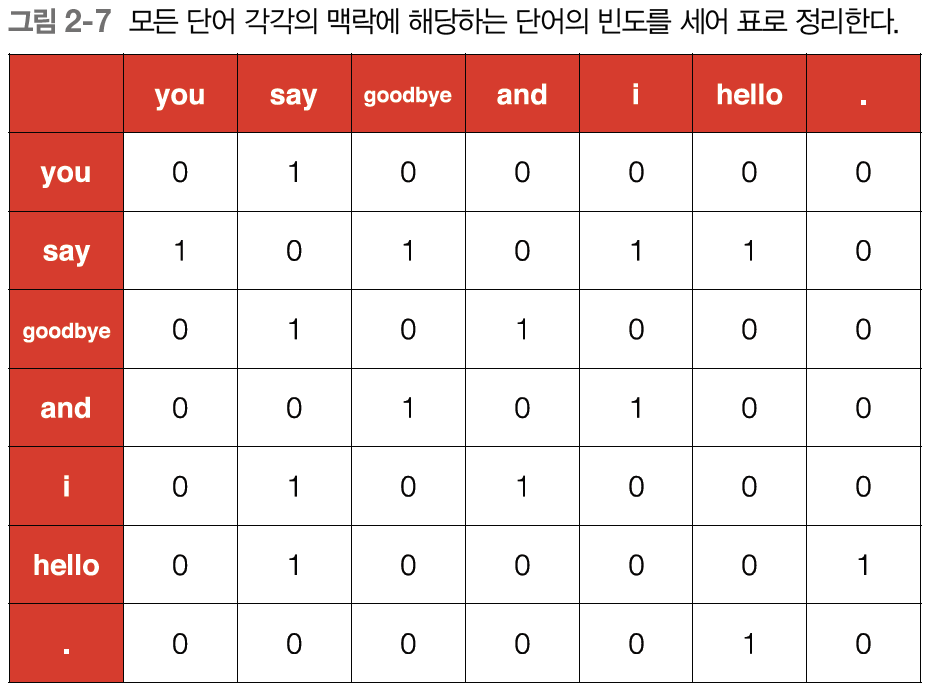

In [18]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

#윈도우 크기 1, 각 단어의 맥락에 해당하는 단어의 빈도를 세어보자.

#you say goodbye and i say hello . 의 맥락을 세어보자.
#단어 : you, say, goodbye, and, i, hello, .
#you : [0, 1, 0, 0, 0,  0, 0]
#say : [1, 0, 1, 0, 1, 1, 0]

from IPython.display import Image
Image('./image/image28.png', width=400)

위 그림은 모든 단어에 대해 동시발생하는 단어를 표에 정리한 것으로 이 표의 행은 해당 단어를 표현한 벡터가 된다. 이 표가 행렬의 형태를 띤다는 뜻에서 '**동시발생행렬(co-occurrence matrix)**'이라고 한다.

In [19]:
C = np.array([[0,1,0,0,0,0,0], [1,0,1,0,1,1,0], [0,1,0,1,0,0,0], [0,0,1,0,1,0,0], [0,1,0,1,0,0,0], [0,1,0,0,0,0,1], [0,0,0,0,0,1,0]], dtype=np.int32)

print(C[4]) #ID가 4인 단어의 벡터 표현
print(C[word_to_id['goodbye']]) #'goodbye' 의 벡터 표현

#자동화를 해보자.

[0 1 0 1 0 0 0]
[0 1 0 1 0 0 0]


In [20]:
def create_co_matrix(corpus, vocab_size, window_size=1): #corpus는 문장의 ID 리스트
    corpus_size = len(corpus) #문장의 ID 개수 측정, 받아들인 문장을 중복 포함해 띄어쓰기 단위로 끊은 개수.
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32) #중복을 제외한 vocab 어휘 개수
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size+1): #1부터 window_size 까지(문맥 찾기)
            left_idx = idx - i #좌우 1칸, 좌우2칸, 좌우3칸씩,. ... 좌우 window_size 까지 문맥 찾기
            right_idx = idx + i
            
            if left_idx >= 0 : #말뭉치의 왼쪽 끝이 경계를 벗어나지 않도록.
                left_word_id = corpus[left_idx] #주어진 인덱스 번호 문자의 ID를 left_word_id 에 받음.
                co_matrix[word_id, left_word_id] +=1 #다 0행렬이었던 co_matrix의 word_id 행 left_word_id 열에 1 추가.(카운팅)
            
            if right_idx < corpus_size: #말뭉치의 오른쪽 끝이 경계를 벗어나지 않도록.
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] +=1
                
    return co_matrix

In [21]:
for i, name in enumerate(['body', 'foo', 'bar']):
    print(i, name)
# enumerate 함수
# 리스트가 있는 경우 순서와 리스트의 값을 전달하는 기능
# 이 함수는 순서가 있는 자료형(리스트, 튜플, 문자열)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴한다.
# 보통 enumerate 함수는 아래 예제처럼 for문과 함께 자주 사용된다.

0 body
1 foo
2 bar


In [22]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

C = create_co_matrix(corpus, len(word_to_id))
print(C)
print(C[0])
print(C[0][1])

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
[0 1 0 0 0 0 0]
1


 ### 2.3.5 벡터 간 유사도
 동시 발생 행렬을 이용해 단어를 벡터로 표현하였다. 그럼 계속해서 벡터 사이의 유사도 측정법을 알아본다. 벡터 사이의 유사도 측정법은 다양하며 대표적으로 벡터의 내적이나 유클리드 거리 등을 꼽는다. 그 외에도 다양하나, 단어 벡터의 유사도를 나타낼 때는 **코사인 유사도(cosine similarity)**를 자주 이용한다.

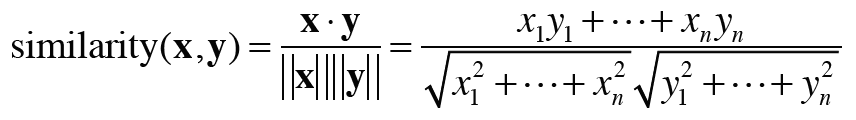

In [23]:
from IPython.display import Image
Image('./image/cosine.png', width=600)

여기에서는 L2 노름을 계산한다.
이 식의 핵심은 벡터를 정규화 하고 내적을 구하는 것이다.

코사인 유사도를 직관적으로 풀어보자면 '두 벡터가 가리키는 방향이 얼마나 비슷한가' 이다. 두 벡터의 방향이 완전히 같다면 코사인 유사도가 1이 되며 완전히 반대라면 -1이 된다.

In [24]:
import numpy as np
def cos_similarity(x,y, eps=1e-8): # epsilon : 1e-8=0.00000001 이 기본값
    nx = x / np.sqrt(np.sum(x**2)+eps)
    ny = y / np.sqrt(np.sum(y**2)+eps)
    return np.dot(nx,ny)

# 인수로 제로 벡터(원소가 모두 0인 벡터)가 들어오면 divide by zero 오류 발생 : eps 이용해 보완

In [25]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text) #말뭉치 전처리

vocab_size = len(word_to_id) #중복 없는 전체 어휘 개수
C = create_co_matrix(corpus, vocab_size) #windowsize = 1(기본)

c0 = C[word_to_id['you']] #you의 단어 벡터
c1 = C[word_to_id['i']] #i의 단어 벡터
print(cos_similarity(c0, c1))
#코사인 유사도 값은 -1부터 1 사이 이므로 이 값은 비교적 높다(유사성이 크다)고 말할 수 있다

0.7071067758832467


### 2.3.6 유사 단어의 랭킹 표시

어떤 단어가 검색어로 주어지면, 그 검색어와 비슷한 단어를 유사도 순으로 출력하는 함수를 구현한다.

In [26]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # 1 : 검색어를 꺼낸다.
    if query not in word_to_id:
        print('{}(을)를 찾을 수 없습니다'.format(query))
        return
    
    print('\n[query]' + query) #\n 은 한 줄 띄기
    query_id = word_to_id[query] #각각 입력받은 query의 id와 vector를 query_id, query_vec 에 저장.
    query_vec = word_matrix[query_id]
    
    # 2 : 코사인 유사도를 계산한다.
    vocab_size = len(id_to_word) #전체 어휘 개수
    similarity= np.zeros(vocab_size) 
    #print(similarity) : [0., 0., 0., 0., 0., 0., 0.]
    for i in range(vocab_size): #전체 어휘 개수만큼
        similarity[i] = cos_similarity(word_matrix[i], query_vec) #각각 i번째 벡터와 query_vec 간 유사도 측정
        #array행렬에 0 대신 유사도 값을 차근차근 계산해서 집어넣는다.
 
    # 3 : 코사인 유사도를 기준으로 내림차순으로 출력한다.
    count = 0
    for i in (-1 * similarity).argsort(): #코사인 유사도 기준으로 내림차순의 인덱스대로 출력.
        if id_to_word[i] == query: # 자기자신과 자기자신은 어차피 유사도 1이고 관심 없으므로 이 경우 제외.
            continue #continue 문은 조건을 만족하면 반복문의 맨 처음으로 올라간다
        print ('{}: {}'.format(id_to_word[i], similarity[i]))
        
        count +=1
        if count >=top: #다 훑으면 종료.
            return

In [45]:
x = np.array([100, -20, 2])
print(x.argsort()) #argsort는 배열 인덱스의 정렬을 바꾸는 데 사용한다. 넘파이 배열의 원소를 오름차순으로 정렬한다.(반환값은 배열의 인덱스)
print((-x).argsort()) #내림차순으로 출력 가능!!

[1 2 0]
[0 2 1]


In [25]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text) #말뭉치 전처리

vocab_size = len(word_to_id) #중복 없는 전체 어휘 개수
C = create_co_matrix(corpus, vocab_size) #windowsize = 1(기본)

print(most_similar('love', word_to_id, id_to_word, C, top=5))

print(most_similar('you', word_to_id, id_to_word, C, top=5))

love(을)를 찾을 수 없습니다
None

[query]you
goodbye: 0.7071067758832467
i: 0.7071067758832467
hello: 0.7071067758832467
say: 0.0
and: 0.0
None


유사도 계산 : you 문맥에 window 1 기준 say 가 있어서 goodbye, i, hello 가 say가 문맥에 있어 높게 나옴

그런데 "I"와 "you" 모두 인칭대명사이므로 둘이 비슷하다는 것은 납득이 간다. 하지만 "goodbye"와 "hello"의 코사인 유사도가 높다는 것은 직관과는 거리가 멀다. 이는 말뭉치의 크기가 너무 작다는 것이 원인이다.

## 2.4 통계 기반 기법 개선하기

## 2.4.1 상호정보량

앞 절에서 본 동시발생 행렬의 원소는 두 단어가 동시에 발생한 횟수를 나타낸다. 그러나 이 "발생" 횟수라는 것은 사실 그리 좋은 특징이 아니다. 고빈도 단어(많이 출현하는 단어)로 눈을 돌려보면 그 이유를 바로 알 수 있다. 예컨대 말뭉치에서 "the"와 "car"의 동시 발생을 생각하면, 이 단어의 동시 발생 횟수는 아주 많다. 한편, "car"와 "drive"는 확실히 관련이 깊다. 하지만 단순히 등장 횟수만을 본다면 "car"는 "drive"보다는 "the"와의 관련성이 훨씬 강하다고 나올 것이다. "the"가 고빈도 단어라서 "car"와 강한 관련성을 갖는다고 평가되기 때문이다.

이 문제를 해결하기 위해 **점별 상호정보량(Pointwise Mutual Information, PMI)**라는 척도를 사용한다. PMI는 확률변수 x와 y에 대해 다음 식으로 정의된다.

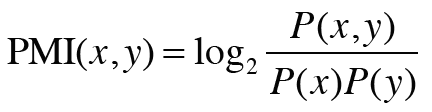

In [30]:
from IPython.display import Image
Image('./image/PMI.png', width=300)

P(x)는 x가 일어날 확률, P(y)는 y가 일어날 확률, P(x,y)는 x와 y가 동시에 일어날 확률로 PMI 값이 높을수록 관련성이 높다는 의미이다.

예를 들어 10,000개의 단어로 이뤄진 말뭉치에서 "the"가 100번 등장하면 P("the") = 100/10000 = 0.01 이다.

또한 P(x,y)는 단어 x와 y가 동시발생할 확률이므로 "the"와 "car"가 10번 동시 발생했다면 P("the", "car") = 10 /10000 = 0.001 이다.

이런 확률을 동시발생 행렬(각 원소는 동시발생한 단어의 횟수)를 사용해 식을 다시 고쳐보자.

C는 동시 발생 행렬, C(x,y)는 단어 x와 y가 동시발생하는 횟수, C(x)와 C(y)는 각각 단어 x와 y의 등장 횟수이다. 이 때 말뭉치에 포함된 단어 전체의 수를 N이라 하면, 식은 다음과 같이 변한다.

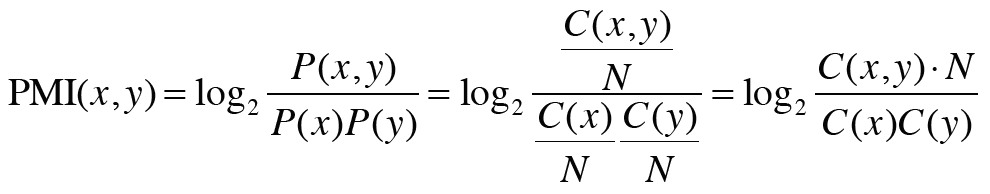

In [33]:
from IPython.display import Image
Image('./image/pmi2.png', width=700)

즉 동시발생 행렬로부터 PMI를 구할 수 있다.

예를 들어 말뭉치의 단어 수가 10,000 이라 하고

"the" : 1000번, "car" : 20번, "drive" : 10번 등장

"the"와 "car"의 동시 발생 횟수는 10회

"car"와 "drive"의 동시 발생 횟수는 5회라고 하면

동시 발생 횟수의 관점에서는 "car"는 "drive"보다 "the"와 관련이 깊다고 나온다.

그러나 PMI 관점에서는 PMI("the", "car") = 2.32, PMI("car", "drive") = 7.97

이러한 결과가 나온 이유는 **단어가 단독으로 출현하는 횟수가 고려되었기 때문**이다. 이 예에서는 "the"가 자주 출현했으므로 PMI 점수가 낮아진 것이다.

이 PMI에도 한 가지 문제가 있다. 바로 두 단어의 동시발생횟수가 0이면 log0=-무한대 가 된다는 점이다. 이 문제를 피하기 위해 실제로 구현할 때에는 **양의 상호정보량(Positive PMI)(PPMI)**을 사용한다.

## PPMI(x,y) = max(0,PMI(x,y))

이 식에 따라 PMI가 음수일 때는 0으로 취급함으로서 단어 사이의 관련성을 0 이상의 실수로 나타낼 수 있다.

In [27]:
def ppmi(C, eps=1e-8):
    M = np.zeros_like(C, dtype = np.float32) #동시발생 행렬 크기만큼 0행렬
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1] # 행렬의 전체 원소의 개수
    cnt = 0
    
    for i in range(C.shape[0]): # 행을 전부 돌자
        for j in range(C.shape[1]): # 열을 전부 돌자
            pmi = np.log2(C[i,j]*N) / (S[j]*S[i] + eps) # C[i,j]는 동시발생횟수 / S[j]는 j번째 숫자의 발생 횟수
            M[i,j] = max(0, pmi)
                    
    return M

# 이 코드에서 np.log2(0)이 음의 무한대가 되는 사태를 피하기 위해 eps=1e-8을 사용했다. (np.log2(x) -> np.log2(x+eps) 로 수정)

In [28]:
# ppmi 행렬 안에 있는 np.sum의 의미 알아보기
text='You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)

C = create_co_matrix(corpus, vocab_size)
N = np.sum(C)
S = np.sum(C, axis=0)
total = C.shape[0] * C.shape[1]

print(C)
print(N) # 모든 행렬값 전부다 합하기
print(S) # 0의 축으로 합하기
print(C.shape)
print(C.shape[0]) # 몇 행
print(C.shape[1]) # 몇 열
print(total) #몇 행 * 몇 열

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
14
[1 4 2 2 2 2 1]
(7, 7)
7
7
49


In [50]:
import numpy as np

text='You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)

print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    0.952 0.    0.    0.    0.    0.   ]
 [0.952 0.    0.476 0.    0.476 0.476 0.   ]
 [0.    0.476 0.    0.952 0.    0.    0.   ]
 [0.    0.    0.952 0.    0.952 0.    0.   ]
 [0.    0.476 0.    0.952 0.    0.    0.   ]
 [0.    0.476 0.    0.    0.    0.    1.904]
 [0.    0.    0.    0.    0.    1.904 0.   ]]


<ipython-input-49-cfea84782118>:10: RuntimeWarning: divide by zero encountered in log2
  pmi = np.log2(C[i,j]*N) / (S[j]*S[i] + eps) # C[i,j]는 동시발생횟수 / S[j]는 j번째 숫자의 발생 횟수


그러나 PPMI 행렬에도 여전히 문제가 있다. 말뭉치의 어휘 수가 증가함에 따라 그 단어 벡터의 차원 수가 증가한다. 예를 들어 말뭉치의 어휘 수가 10만개 라면 그 벡터의 차원 수도 똑같이 10만이 된다. 즉 10만 차원의 벡터를 다룬다는 것은 그다지 현실적이지 않다.

또한 이 행렬의 내용을 들여다보면 원소 대부분이 0인 것을 알 수 있다. 벡터의 원소 대부분이 중요하지 않다는 뜻이다. 다르게 표현하면 각 원소의 '중요도'가 낮다는 뜻이다. 더구나 이런 벡터는 노이즈에 약하고 견고하지 못하다는 약점도 있다. 이 문제에 대처하고자 자주 수행하는 기법이 바로 벡터의 차원 감소이다.

## 2.4.2 차원 감소(dimensionality reduction)
차원 감소는 문자 그대로 벡터의 차원을 줄이는 방법으로, 단순히 줄이기만 하는 게 아니라 **"중요한 정보"는 최대한 유지하면서 벡터의 차원을 줄이는 것**이 핵심이다. 직관적인 예로 데이터의 분포를 고려해 중요한 '축'을 찾는 일을 수행한다.

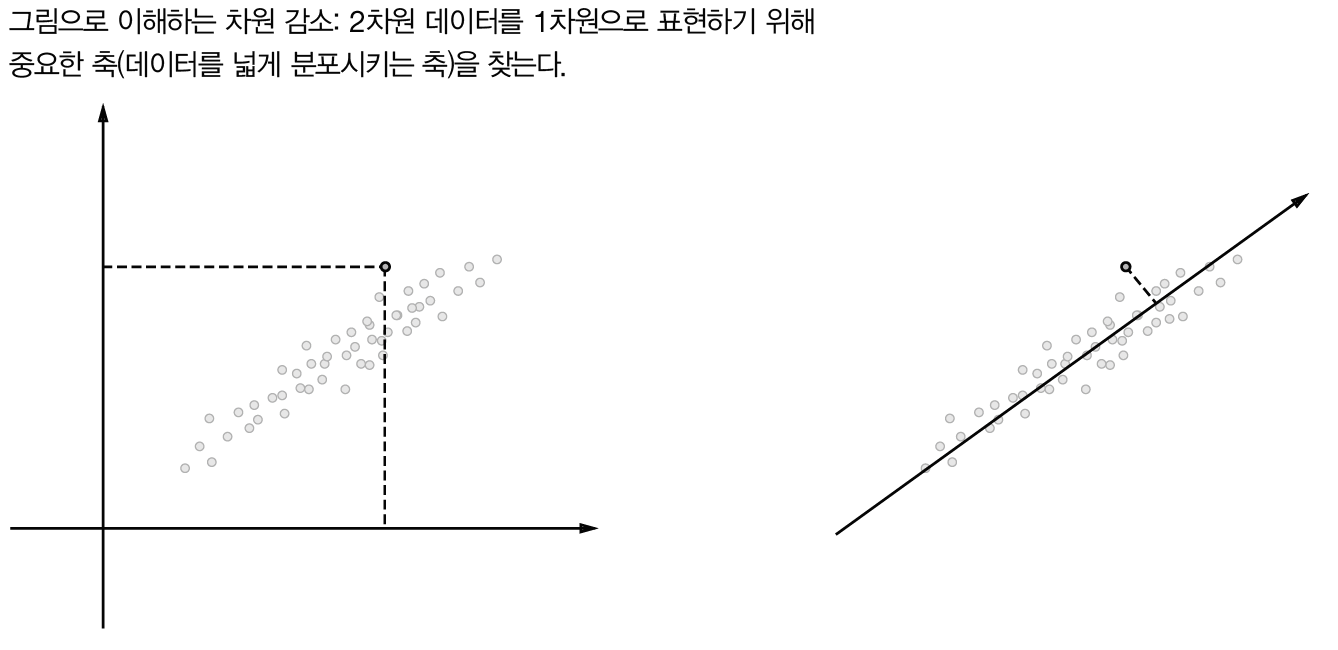

In [54]:
from IPython.display import Image
Image('./image/dimen.png', width=700)

2차원 데이터를 1차원으로 표현하기 위해 새로운 축을 도입해 똑같은 데이터를 좌표축 하나만으로 표시했다. (새로운 중요한 축을 찾을 때는 데이터를 넓게 분포시키는 축을 찾는다.)

이 때 각 데이터점의 값은 "새로운 축으로 사영된 값"으로 변한다. 여기서 중요한 것은 가장 적합한 축을 찾아내는 일로, 1차원 값만으로도 데이터의 본질적인 차이를 구별할 수 있어야 한다. 이와 같은 작업은 다차원 데이터에 대해서도 수행할 수 있다.

NOTE_ 원소 대부분이 0인 행렬 또는 벡터를 희소 행렬(sparse matrix)또는 희소 벡터(sparse vector)라 한다. 차원 감소의 핵심은 희소 벡터에서 중요한 축을 찾아내어 더 작은 차원으로 다시 표현하는 것으로, 차원 감소의 결과로 원래의 희소 벡터는 원소 대부분이 0이 아닌 값으로 구성된 '밀집 벡터'로 변환된다. 이 조밀한 벡터야 말로 우리가 원하는 단어의 분산 표현이다.

차원을 감소시키는 방법은 여러가지이지만, 우리는 **특잇값분해(Singular Value Decomposition)(SVD)**를 이용한다. SVD는 임의의 행렬을 세 행렬의 곱으로 분해하며, 수식으로는 X=USV^T 이다. U,V 는 직교행렬, S는 대각성분 외에는 모두 0인 행렬

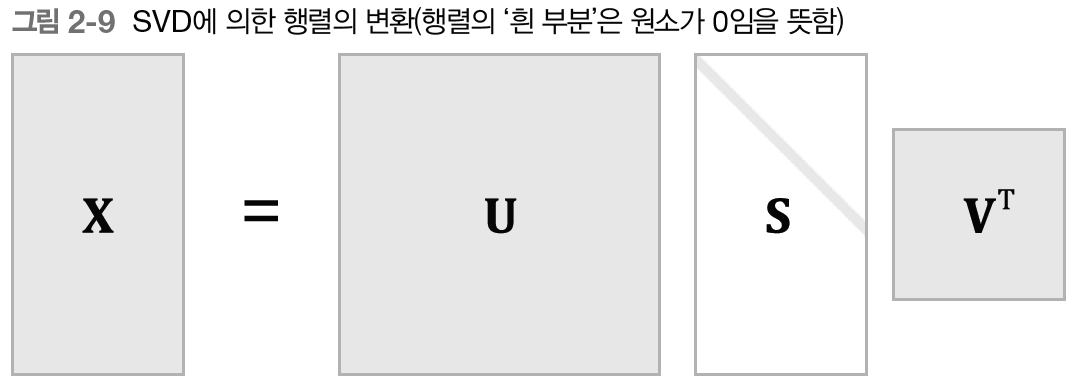

In [55]:
from IPython.display import Image
Image('./image/svd.png', width=700)

지금 우리의 맥락에서 이 U행렬을 '단어 공간'으로 취급한다. 또한 S는 대각행렬로, 그 대각성분에는 '특잇값(singular value)'이 큰 순서대로 나열되어 있다. 특잇값이란, 쉽게 말해 '해당 축'의 중요도라고 간주할 수 있다. 그래서 중요도가 낮은 원소(특잇값이 작은 원소)를 깎아내는 방법을 생각할 수 있다. 행렬 S에서 특잇값이 작다면 중요도가 낮다는 뜻이므로, 행렬 U에서 여분의 열벡터를 깎아내어 원래의 행렬을 근사할 수 있다.

이를 '단어의 PPMI 행렬'에 적용해보면, 행렬 X의 각 행에는 해당 단어 ID의 단어 벡터가 저장되어 있으며, 그 단어 벡터가 행렬 U'이라는 차원 감소된 벡터로 표현되는 것이다.

NOTE. 단어의 동시발생 행렬은 정방행렬이나 위 아래 그림 통일을 위해 직사각형을 그대로 유지했다.

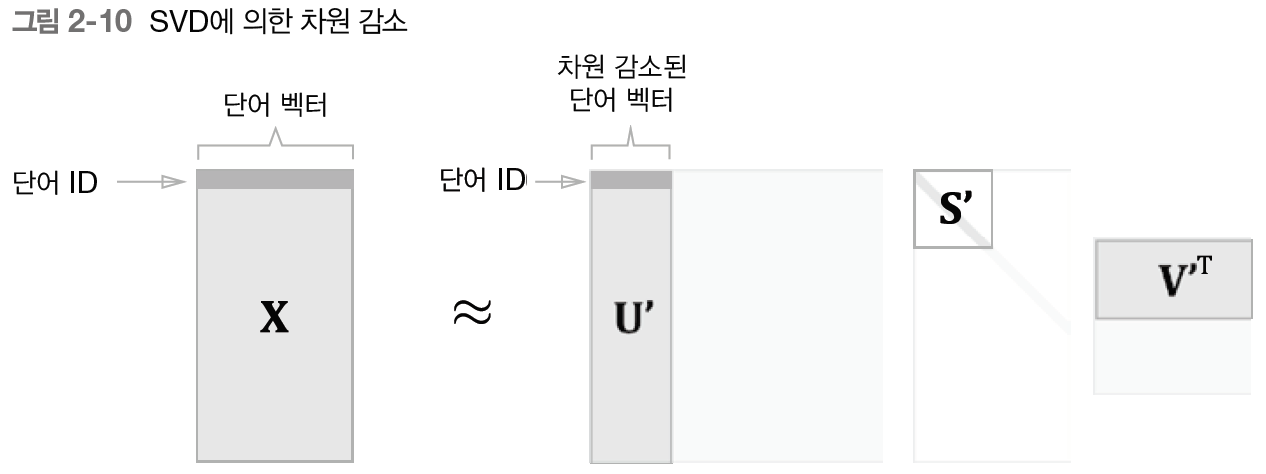

In [57]:
from IPython.display import Image
Image('./image/svd2.png', width=700)

## 2.4.3 SVD에 의한 차원 감소
SVD는 넘파이의 linalg 모듈이 제공하는 svd 메서드로 실행할 수 있다. 참고로, "linalg"는 선형대수(linear algebra)의 약어이다. 그럼, 동시발생행렬을 만들어 PPMI 행렬로 변환한 다음 SVD를 적용해본다.

In [29]:
import numpy as np
import matplotlib.pyplot as plt

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# W는 PPMI (양의 상호정보량 행렬)

# SVD
U, S, V = np.linalg.svd(W)

<ipython-input-27-cfea84782118>:10: RuntimeWarning: divide by zero encountered in log2
  pmi = np.log2(C[i,j]*N) / (S[j]*S[i] + eps) # C[i,j]는 동시발생횟수 / S[j]는 j번째 숫자의 발생 횟수


In [69]:
print(C[0]) #동시발생행렬
print(W[0]) #PPMI행렬
print(U[0]) #SVD

print(U[0, :2]) 
# 밀집벡터의 차원을 감소시키려면, 예컨대 2차원 벡터로 줄이려면 단순히 처음의 두 원소를 꺼내면 된다는데
# <<<왜 그런지 모르겠다. 특잇값이 큰 경우의 2개의 singular vector만 꺼내는건가..? 이건 SVD를 통달해야 알 수 있는 건가?
# U[0] 에 담긴 숫자가 크기 순 정렬은 확실히 아닌거 같지?

[0 1 0 0 0 0 0]
[0.    0.952 0.    0.    0.    0.    0.   ]
[-1.882e-01 -1.110e-16 -3.051e-01 -2.220e-16  0.000e+00  9.335e-01
  5.272e-17]
[-1.882e-01 -1.110e-16]


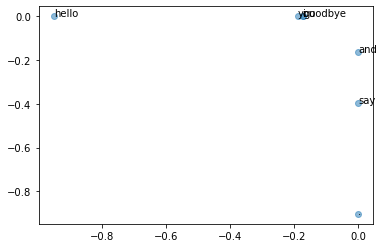

In [71]:
# 단어를 2차원 벡터로 표현한 후 그래프로 그려보자.

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1])) 
    # plt.annotate(word, x, y) 메서드는 2차원 그래프 상에서 좌표 (x,y) 지점에 담긴 텍스트를 그린다.
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

# you 와 i가 가까이 있다. (이유는 모르겠지만 책하고 그래프가 약간 다르게 나옴)

## 참고) 숫자 표현 방법 (e는 10의 지수 승을 나타냄)

1e4, 1e+04 = 1 * 10^4 = 10000

1e-3, 1e-03 = 1 * 10^(-3) = 0.001

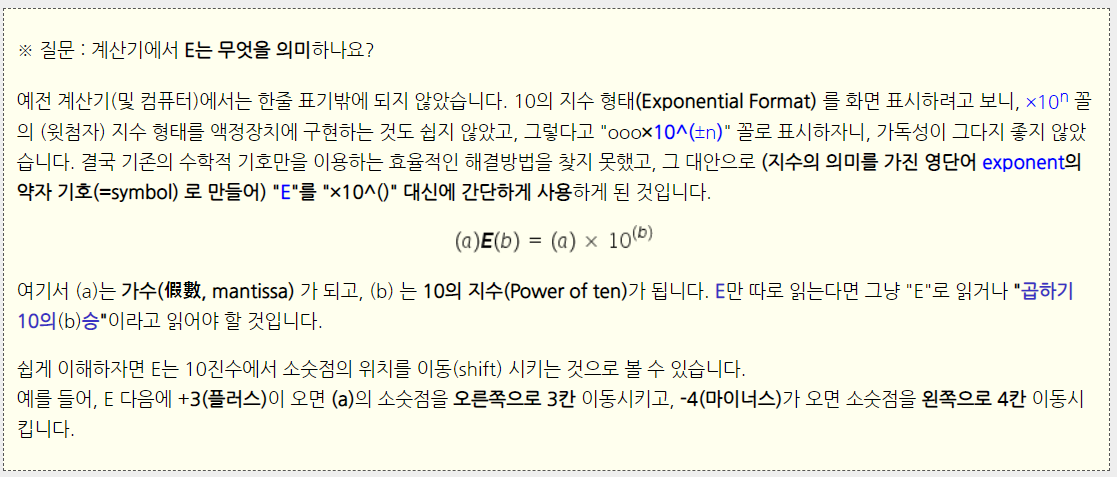

In [62]:
from IPython.display import Image
Image('./image/exp.png', width=900)

지금 사용한 말뭉치가 작아 이 결과를 그대로 받아들이기는 석연치 않으므로 PTB 데이터셋이라는 큰 말뭉치를 사용해 똑같은 실험을 수행해본다.

WARNING_ 행렬 크기가 N이면 SVD 계산은 O(N^3)이 걸린다. 계산량이 N의 3제곱에 비례해 늘어난다. 이는 현실적으로 감당하기 어려운 수준이므로 Truncated SVD같은 더 빠른 방법을 사용한다. Truncated SVD는 특잇값이 작은 것은 버리는(truncated) 방식으로 성능 향상을 꾀한다. 다음 절에서도 옵션으로 사이킷런(scikit-learn) 라이브러리의 Truncated SVD를 이용한다.

## 2.4.4 PTB 데이터셋
이번 절에서 '본격적인 크기'의 말뭉치를 이용한다. 그 주인공은 바로 **펜 트리뱅크(Penn Treebank(PTB))**이다. PTB 말뭉치는 주어진 기법의 품질을 측정하는 벤치마크로 자주 이용된다. PTB말뭉치는 word2vec의 발명자인 토마스 미콜로프의 웹페이지에서 받을 수 있다. 이 PTB 말뭉치는 텍스트 파일로 제공되며, 원래의 PTB 문장에 몇 가지 전처리를 해두었다. 예컨대 희소한 단어를 \<unk>라는 특수 문자로 치환한다거나 (unk는 unknown의 약어) 구체적인 숫자를 "N"으로 대체하는 등의 작업이 적용되었다.
    
PTB 말뭉치에는 한 문장이 하나의 줄로 저장되어 있고 이 책에서는 각 문장을 연결한 '하나의 큰 시계열 데이터'로 취급한다. 이 때 각 문장 끝에 \<eos>라는 특수문자를 삽입한다.(eos는 end of sentence의 약어)

이 책에서는 문장의 구분을 고려하지 않고, 여러 문장을 연결한 하나의 큰 시계열 데이터로 간주한다. 물론 문장 단위로 처리할 수도 있지만 이 책에서는 원리를 간단히 보여주고자 문장 단위 처리는 수행하지 않는다.

In [76]:
# cf) sys.path 가 도대체 뭘까

sys.path
# 파이썬 모듈이 sys.path 안의 디렉토리에 들어 있다면 모듈이 저장된 디렉토리로 이동할 필요 없이 바로 불러서 사용할 수가 있다

['C:\\Users\\82103\\A. 모두를 위한 딥러닝',
 'C:\\Users\\82103\\anaconda3\\python38.zip',
 'C:\\Users\\82103\\anaconda3\\DLLs',
 'C:\\Users\\82103\\anaconda3\\lib',
 'C:\\Users\\82103\\anaconda3',
 '',
 'C:\\Users\\82103\\anaconda3\\lib\\site-packages',
 'C:\\Users\\82103\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\82103\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\82103\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\82103\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\82103\\.ipython',
 '..',
 '..']

In [77]:
# coding: utf-8
import sys
sys.path.append('..')
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
# ptb.load_data()는 데이터를 읽어 들인다.
# 이 때 인수로는 'train', 'test', 'valid' 중 하나를 지정할 수 있는데, 차례대로 '훈련용', '테스트용', '검증용'을 가리킨다


# corpus에는 단어 ID 목록 저장(중복 포함해 문자에 나오는 단어 순서대로)
# id_to_word 는 단어 ID에서 단어로 변환하는 딕셔너리
# word_to_id 는 단어에서 단어 ID로 변환하는 딕셔너리

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


## 2.4.5 PTB 데이터셋 평가
PTB 데이터셋에 통계 기반 기법을 적용해본다. 이번에는 큰 행렬에 SVD를 적용해야 하므로 고속 SVD를 이용할 것을 추천한다. 고속 SVD를 이용하려면 sklearn 모듈을 설치해야 한다. 물론 간단한 SVD(np.linalg.svd())도 사용할 수 있지만, 시간이 훨씬 오래 걸리고 메모리도 훨씬 많이 사용한다.

In [79]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from dataset import ptb

window_size = 2 #문맥 앞 뒤 2칸
wordvec_size = 100 #각 벡터는 100차원

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C) #W는 ppmi (양의 상호정보량)

print('calculating SVD ...')
try:
    # truncated SVD (빠르다!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    # SVD (느리다)
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

동시발생 수 계산 ...
PPMI 계산 ...


<ipython-input-51-cfea84782118>:10: RuntimeWarning: divide by zero encountered in log2
  pmi = np.log2(C[i,j]*N) / (S[j]*S[i] + eps) # C[i,j]는 동시발생횟수 / S[j]는 j번째 숫자의 발생 횟수
<ipython-input-51-cfea84782118>:10: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i,j]*N) / (S[j]*S[i] + eps) # C[i,j]는 동시발생횟수 / S[j]는 j번째 숫자의 발생 횟수
<ipython-input-51-cfea84782118>:10: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i,j]*N) / (S[j]*S[i] + eps) # C[i,j]는 동시발생횟수 / S[j]는 j번째 숫자의 발생 횟수


calculating SVD ...

[query]you
good: 0.7337405681610107
solely: 0.733093798160553
gift: 0.6917110085487366
bartlett: 0.686255931854248
highly: 0.6814859509468079

[query]year
choose: 0.7336377501487732
meetings: 0.7126189470291138
despite: 0.6898081302642822
cosmetics: 0.6821373701095581
investigators: 0.6765154600143433

[query]car
gas: 0.7937257289886475
union: 0.75616455078125
co.: 0.739396870136261
storage: 0.7214382886886597
pump: 0.7143056392669678

[query]toyota
luxury: 0.8979566097259521
stanza: 0.8705779314041138
disks: 0.8581361770629883
disk: 0.8535403609275818
businesses: 0.8485730886459351


## 2.5 정리
이번 장에서는 자연어를 대상으로, 특히 컴퓨터에게 '단어의 의미' 이해시키기를 주제로 이야기를 진행했다. 이 목적을 달성하기 위한 여정으로 먼저 시소러스를 이용한 기법을 설명하고 이어서 통계 기반 기법을 살펴봤다.

시소러스 기반 기법에서는 단어들의 관련성을 사람이 수작업으로 하나씩 정의한다. 이 작업은 매우 힘들고 표현력에도 한계가 있다. 한편, 통계 기반 기법은 말뭉치로부터 단어의 의미를 자동으로 추출하고, 그 의미를 벡터로 표현한다. 구체적으로는 단어의 동시발생 행렬을 만들고, PPMI 행렬로 변환한 다음, 안전성을 높이기 위해 SVD를 이용해 차원을 감소시켜 각 단어의 분산 표현을 만들어낸다. 그리고 분산 표현에 따르면 의미가, 그리고 문법적인 용법 면에서 비슷한 단어가 벡터 공간에 서로 가까이 모여 있다.

- 현재는 말뭉치를 이용해 단어를 벡터화하는 방식이 주로 쓰인다.
- 최근의 단어 벡터화 기법들은 대부분 '단어의 의미는 주변 단어에 의해 형성된다.'는 분포 가설에 기초한다.
- 통계 기반 기법은 말뭉치 안의 각 단어에 대해서 그 단어의 주변 단어의 빈도를 집계한다. (동시 발생 행렬)
- 동시발생 행렬을 PPMI 행렬로 변화하고 다시 차원을 감소시킴으로써, 거대한 '희소벡터'를 작은 '밀집벡터'로 변환할 수 있다.
- 단어의 벡터공간에서는 의미가 까까운 단어는 그 거리도 가까울 것으로 기대된다.

# 3. word2vec

#### *근거 없이 추론하는 건 금물이야*
#### *-코넌 도일, <셜록 홈즈의 모험(보헤미아 왕국의 스캔들)>*

이번 장의 주제도 단어의 분산 표현이다. 앞 장에서는 '통계 기반 기법'으로 단어의 분산 표현을 얻었는데, 이번 장에서는 더 강력한 기법인 '추론 기반 기법'을 살펴본다. '추론 기반 기법'에서는 추론 과정에 신경망을 이용하는데, 여기서 그 유명한 word2vec이 등장한다. 이번 장에서는 word2vec의 구조를 차분히 들여다보고 구현해보며 확실하게 이해해보고자 한다.

## 3.1 추론 기반 기법과 신경망

'통계 기반 기법'과 '추론 기반 기법'은 단어의 의미를 얻는 방식은 서로 크게 다르지만, 그 배경에는 모두 분포 가설이 있다.
이번 절에서는 통계 기반 기법의 문제를 지적하고 그 대안인 추론 기반 기법의 이점을 거시적 관점에서 설명한다. 그런 다음 word2vec의 전처리를 위해 신경망으로 '단어'를 처리하는 예를 보인다.

## 3.1.1 통계 기반 기법의 문제점
통계 기반 기법은 단어의 동시발생 행렬을 만들고, 그 행렬에 ppmi + SVD를 적용하여 밀집벡터를 얻었다. 그러나 이 방식은 **대규모 말뭉치를 다룰 때 문제가 발생**한다. 현업에서 다루는 말뭉치의 어휘 수는 어마어마하다. 예컨대 영어의 어휘 수는 100만을 넘는다. 어휘가 100만개라면, 통계 기반 기법에서는 100만x100만 이라는 거대 행렬을 만들어야 한다. 이런 거대 행렬에 SVD를 적용하는 일은 비현실적이다.

NOTE_ SVD를 nxn 행렬에 적용하는 비용은 O(n^3)으로 슈퍼컴퓨터를 동원해도 처리할 수 없는 수준이다. 실제로는 근사적인 기법과 희소행렬의 성질 등을 이용해 속도를 개선할 수 있다만, 그렇다 해도 여전히 상당한 컴퓨팅 자원을 들여 장시간 계산해야 한다.

통계 기반 기법 : 말뭉치 전체의 통계(동시발생 행렬과 PPMI 등)을 이용해 단 1회의 처리(SVD 등)만에 단어의 분산 표현을 얻는다. 학습 데이터를 한꺼번에 처리한다.(배치학습)

추론 기반 기법(신경망 이용) : 미니배치로 학습한다. 신경망이 한번에 소량(미니배치)의 학습 샘플씩 반복해서 학습하며 가중치를 갱신해간다. 학습 데이터의 일부를 사용해 순차적으로 학습한다.(미니배치 학습)

즉 추론 기반 학습은 말뭉치의 어휘 수가 많아 SVD 등 계산량이 큰 작업을 처리하기 어려운 경우에도 신경망을 학습시킬 수 있다. 왜냐하면 데이터를 작게 나눠 학습하기 때문이다. 게다가 여러 머신과 여러 GPU를 이용한 병렬 계산도 가능해져 학습 속도를 높일 수 있다.

## 3.1.2 추론 기반 기법 개요
"추론"이란 **주변 단어(맥락)가 주어졌을 때 "?"에 무슨 단어가 들어가는지를 추측하는 작업**이다.

ex) you ( ? ) goodbye and I say hello.

이러한 추론 문제를 풀고 학습하는 것이 '추론 기반 기법'이 다루는 문제이다. 이러한 추론 문제를 반복해서 풀면서 단어의 출현 패턴을 학습하는 것이다.

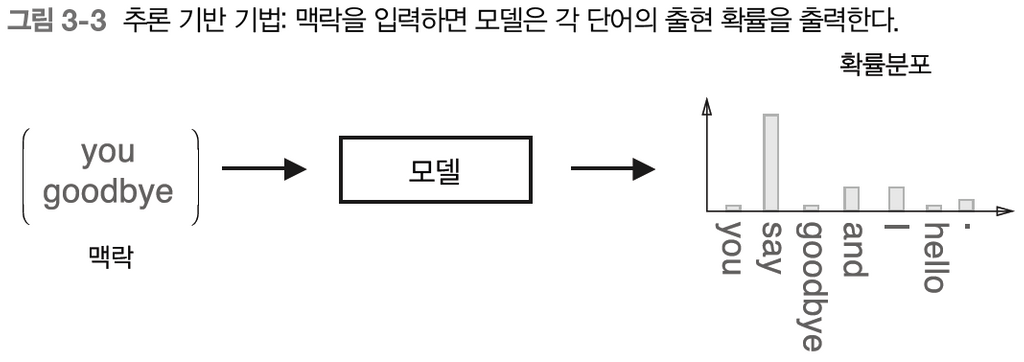

In [84]:
Image('./image/a1.png', width=600)

이처럼 추론 기반 기법에는 어떤 '모델'이 등장하고 우리는 이 모델로 신경망을 사용한다. 모델은 맥락 정보를 입력받아 출현할 수 있는 각 단어의 출현 확률을 출력한다. 이러한 틀 안에서 말뭉치를 사용해 모델이 올바른 추측을 내놓도록 학습시킨다. 그리고 그 학습의 결과로 단어의 분산 표현을 얻는 것이 추론 기반 기법의 전체 그림이다.

## 3.1.3 신경망에서의 단어 처리
지금부터 신경망을 이용해 단어를 처리한다. 신경망은 'you' 등의 단어를 있는 그대로 처리할 수 없으므로 단어를 '고정 길이의 벡터'로 변환해야 한다. 이 때 사용하는 대표적인 방법이 **원핫 표현(원핫 벡터)**로 변환하는 것이다. 원핫 표현이란 벡터의 원소 중 하나만 1이고 나머지는 모두 0인 벡터를 말한다.

예) you -> 단어 ID : 0 -> 원핫 표현 : (1,0,0,0,0,0,0)
예) goodbye -> 단어 ID : 2 -> 원핫 표현 : (0,0,1,0,0,0,0)

단어를 벡터로 나타낼 수 있고, 신경망을 구성하는 계층들은 벡터를 처리할 수 있으므로 단어를 신경망으로 처리할 수 있다.

신경망은 완전연결계층이므로 각각의 노드가 이웃 층의 모든 노드와 화살표로 연결돼있다. 이 화살표에는 가중치(매개변수)가 존재하여 입력층 뉴런과의 가중치 합(weighted sum)이 은닉층 뉴런이 된다. 참고로 이번 장에서 사용하는 완전 연결 계층에서는 편향을 생략했다. (편향을 이용하지 않는 완전연결계층은 행렬 곱(MatMul) 계산에 해당한다. 딥러닝 프레임워크들은 일반적으로 완전연결계층을 생성할 때 편향을 이용할지 선택할 수 있도록 해준다.)

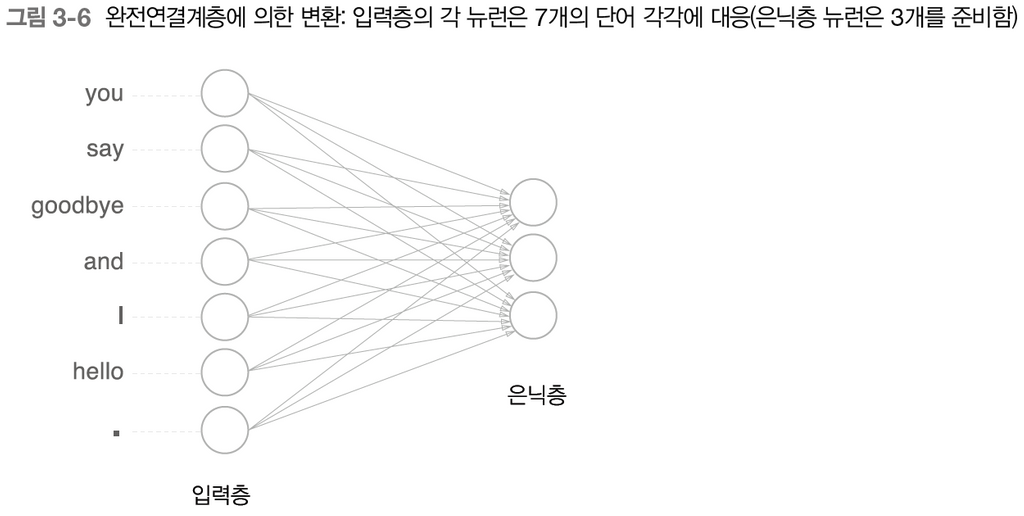

In [85]:
Image('./image/11.png', width=600)

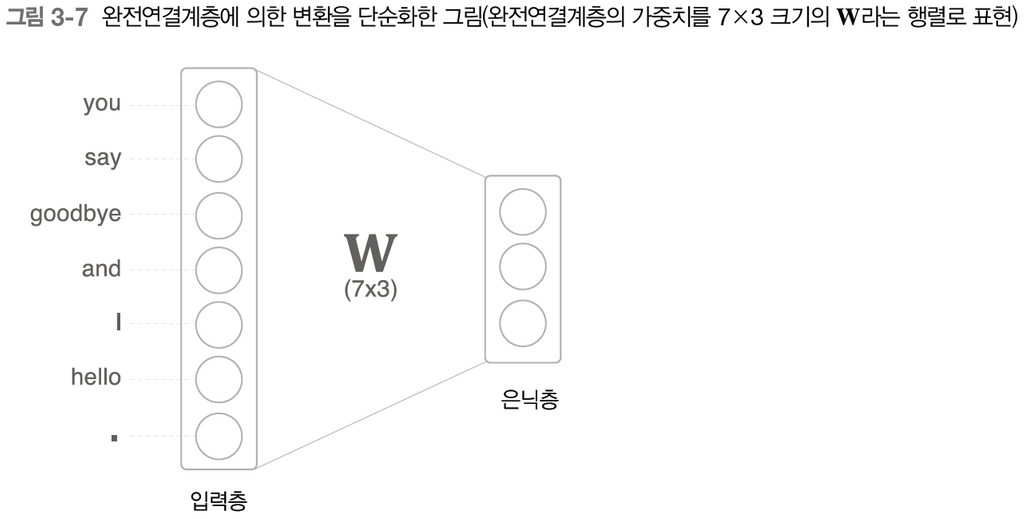

In [86]:
Image('./image/22.png', width=600)

[-0.299 -0.954  0.159]


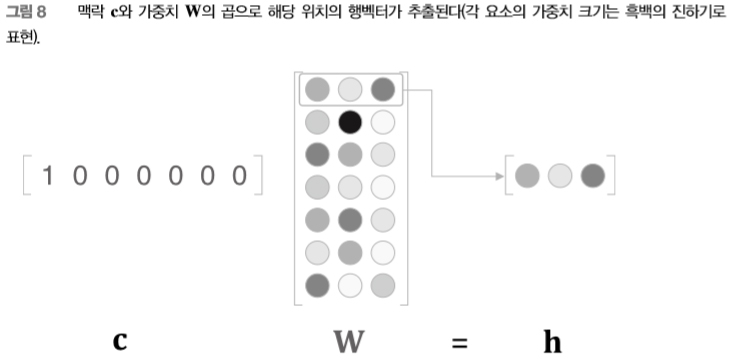

In [88]:
import numpy as np

c = np.array([1,0,0,0,0,0,0]) #입력
W = np.random.randn(7,3) #가중치
h = np.matmul(c,W) #중간 노드. 편향 생략
print(h)

# c와 W의 행렬곱 부분에서 c는 원핫 표현이므로 단어 ID에 대응하는 원소만 1이다.
# 따라서 앞 코드의 c와 W의 행렬 곱은 결국 가중치의 행벡터 하나를 뽑아낸 것과 같다.

Image('./image/33.jpg', width=700)

이제 '모델'을 신경망으로 구축한다. 이번 절에서 사용할 신경망은 word2vec 에서 제안하는 CBOW(continuous bag-of-words) 모델이다.

WARNING_ word2vec 이라는 용어는 원래 프로그램이나 도구를 가리키는 데 사용했다. 그런데 이 용어가 유명해지면서 문맥에 따라서는 신경망 모델을 가리키는 경우도 볼 수 있다. CBOW 모델과 skip-gram 모델은 word2vec 에서 사용되는 신경망이다.

## 3.2.1 CBOW 모델의 추론 처리
CBOW 모델은 **맥락으로부터 타깃(target)을 추측하는 용도의 신경망**이다. (타깃은 중앙 단어이고, 그 주변 단어들이 맥락이다.) 우리는 이 CBOW 모델이 가능한 한 정확하게 추론하도록 훈련시켜 단어의 분산 표현을 얻어낼 것이다.

CBOW 모델의 입력은 맥락이다. 맥락은 'you'와 'goodbye'와 같은 단어들의 목록이다. 가장 먼저, 이 맥락을 원핫 표현으로 변환하여 CBOW 모델이 처리할 수 있도록 준비한다.

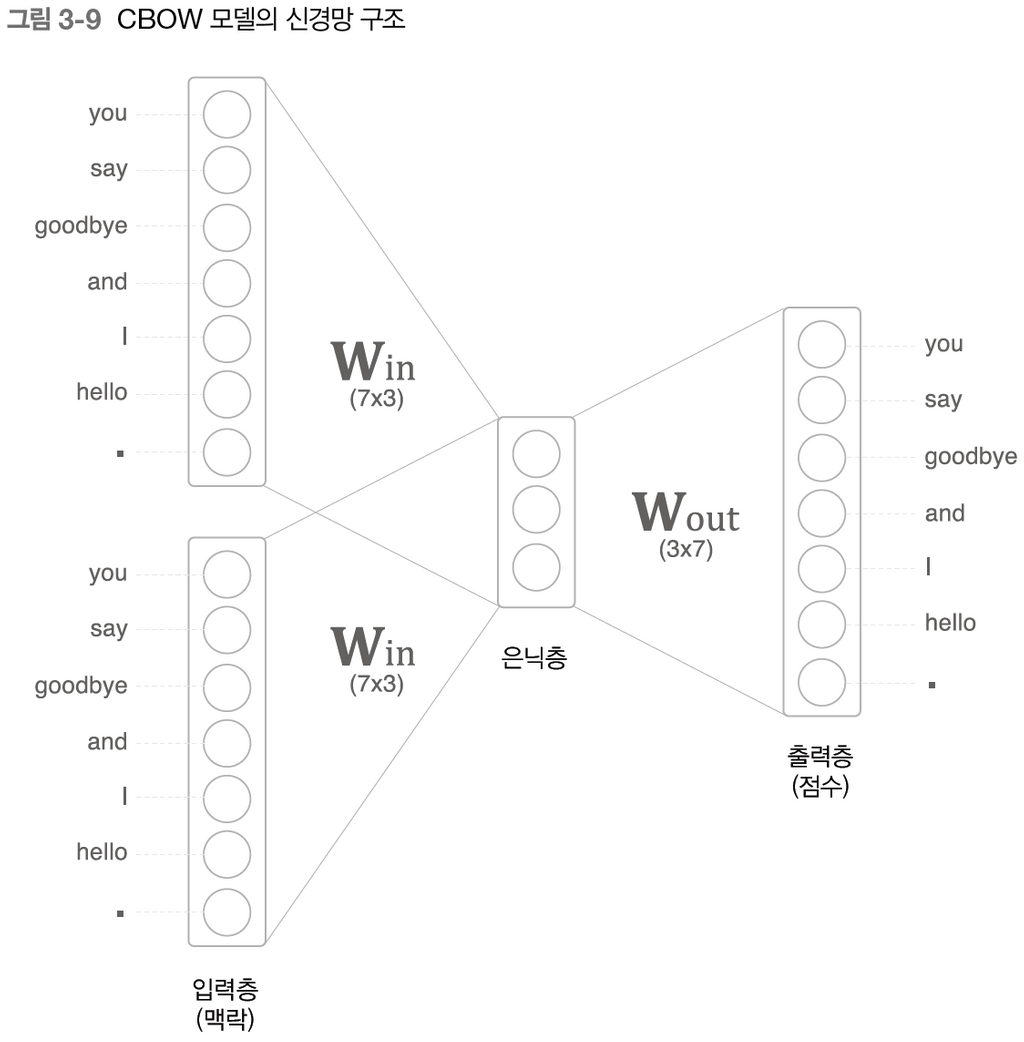

In [92]:
Image('./image/cbow.png', width=600)

CBOW 모델의 신경망은 입력층이 2개 있고 은닉층을 거쳐 출력층에 도달한다. 두 입력층에서 은닉층으로의 변환은 똑같은 완전연결계층(가중치는 W_in)이 처리한다. 그리고 은닉층에서 출력층 뉴런으로의 변환은 다른 완전연결계층(가중치는 W_out)이 처리한다.

NOTE_ 이 그림에서 입력층이 2개인 이유는 맥락으로 고려할 단어를 2개로 정했기 때문이다. 즉, 맥락에 포함시킬 단어가 N개라면 입력층도 N개가 된다.

은닉층에 주목하자. 은닉층의 뉴런은 입력층의 완전연결계층에 의해 변환된 값이 되는데, 입력층이 여러 개이면 전체를 '평균'하면 된다. 완전연결계층에 의한 첫 번째 입력층이 h1으로 변환되고, 두 번째 입력층이 h2로 변환되었다고 하면, 은닉층 뉴런은 1/2(h1+h2)가 되는 것이다.

마지막으로 출력층을 보자. 출력층의 뉴런은 총 7개인데, 여기서 중요한 것은 이 뉴런 하나하나가 각각의 단어에 대응한다는 점이다. 그리고 출력층 뉴런은 각 단어의 '점수'를 뜻하며, 값이 높을수록 대응 단어의 출현 확률도 높아진다. 여기서 점수란 확률로 해석되기 전의 값이고, 이 점수에 소프트맥스 함수를 적용해서 '확률'을 얻을 수 있다.

입력층에서 은닉층으로의 변환은 완전연결계층(가중치는 W_in)에 의해서 이뤄진다. 이때 완전연결계층의 가중치 Win은 7x3 행렬이며, 이 가중치가 바로 단어의 분산 표현의 정체이다. 즉 가중치 W_in의 각 행에는 해당 단어의 분산 표현이 담겨 있다고 볼 수 있다. 따라서 학습을 잘 진행할수록 맥락에서 출현하는 단어를 잘 추측하는 방향으로 이 분산 표현들이 갱신될 것이다. 그리고 놀랍게도 이렇게 해서 얻은 벡터에는 '단어의 의미'도 잘 녹아들어 있다!

NOTE_ 은닉 층의 뉴런 수를 입력층의 뉴런수보다 적게 하는 것이 중요한 핵심이다. 이렇게 해야 은닉층에는 단어 예측에 필요한 정보를 '간결하게' 담게 되며, 결과적으로 밀집벡터 표현을 얻을 수 있다. 이때, 그 은닉층의 정보는 우리 인간은 이해할 수 없는 코드로 쓰여 있다. 바로 '인코딩'에 해당한다. 한편, 은닉층의 정보로부터 원하는 결과를 얻는 작업은 '디코딩'이라고 한다. 즉, 디코딩이란 인코딩된 정보를 우리 인간이 이해할 수 있는 표현으로 복원하는 작업이다.

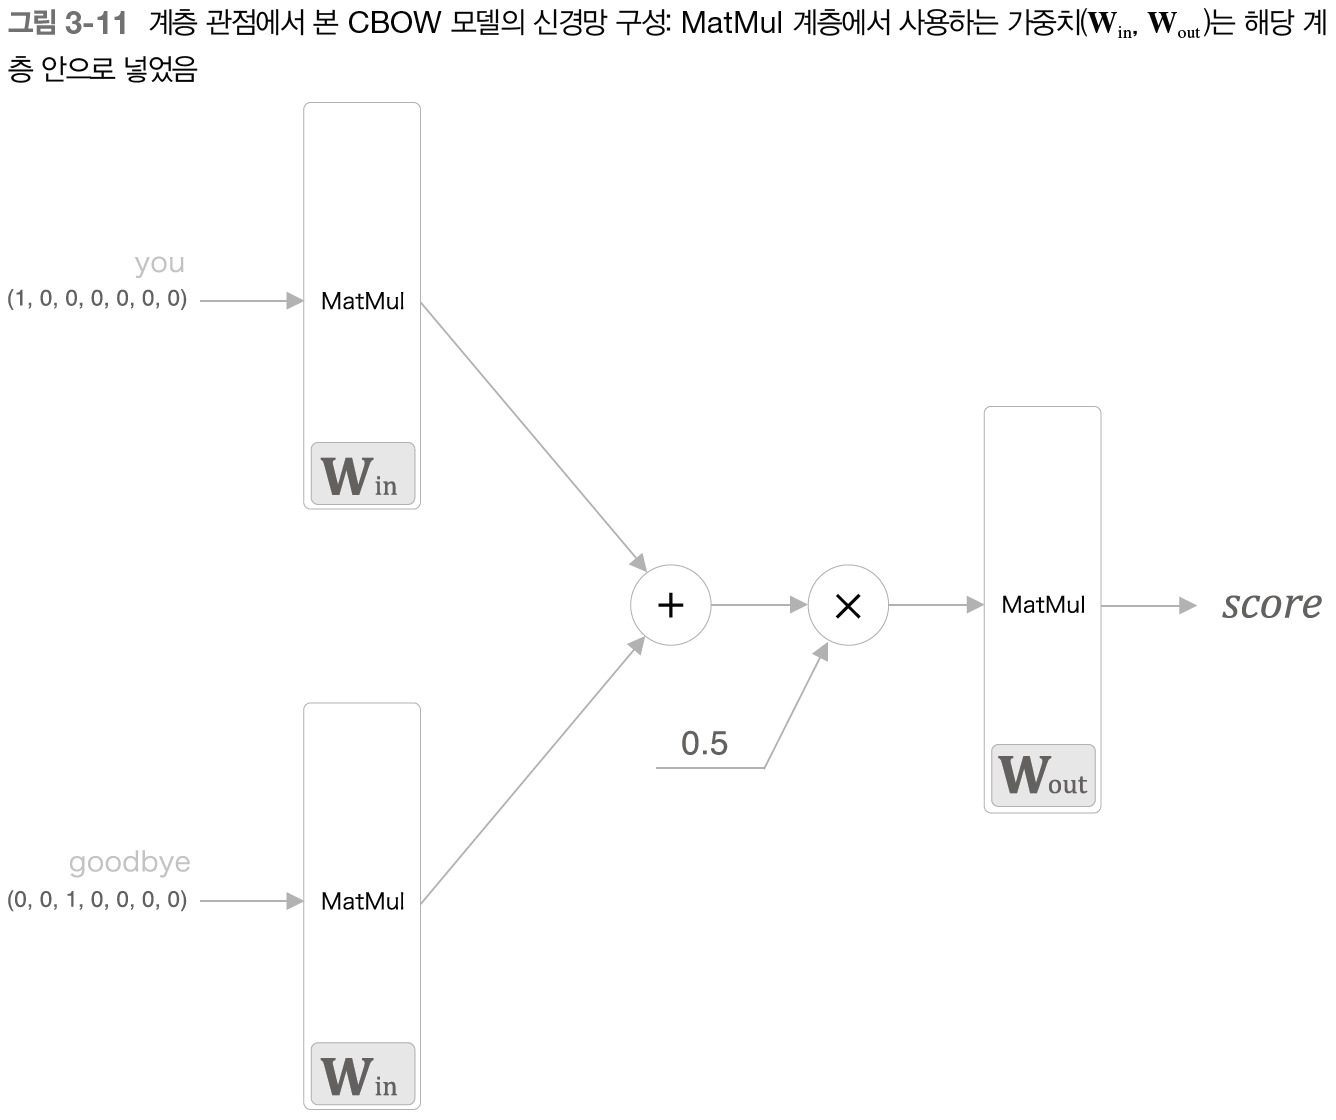

In [2]:
from IPython.display import Image
Image('./image/cbow2.png', width=600)

 CBOW 모델의 가장 앞단에는 2개의 MatMul 계층이 있고, 이어서 두 계층의 출력이 더해진다. 그리고 더해진 값에 0.5를 곱하면 평균이 되며, 이 평균이 은닉층 뉴런이 된다. 마지막으로 은닉층 뉴런에 또 다른 MatMul 계층이 적용되어 점수(score)가 출력된다.

In [4]:
import numpy as np
from common.layers import MatMul

#샘플 맥락 데이터
c0 = np.array([[1,0,0,0,0,0,0]])
c1 = np.array([[0,0,1,0,0,0,0]])

#가중치 초기화
W_in = np.random.randn(7,3)
W_out = np.random.randn(3,7)

#계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in) # 입력층 측의 MatMul 계층은 가중치 W_in을 공유한다.
out_layer = MatMul(W_out)

#순전파
h0 = in_layer0.forward(c0) # 중간 데이터 계산 (1x3 행렬)
h1 = in_layer1.forward(c1) # 중간 데이터 계산 (1x3 행렬)
h = 0.5 *(h0+h1)                                            
s = out_layer.forward(h)

print(s)

[[ 1.32692552  0.20398189 -0.44324259  0.62344963  1.40331026 -0.43425832
  -1.93683785]]


## 3.2.2 CBOW 모델의 학습
지금까지 설명한 CBOW 모델은 출력층에서 각 단어의 점수를 출력했다. 이 점수에 소프트맥스 함수를 적용하면 '확률'을 얻을 수 있다. 이 확률은 맥락(전후 단어)이 주어졌었을 때 그 중앙에 어떤 단어가 출현하는지를 나타낸다.

CBOW 모델의 학습에서는 올바른 예측을 할 수 있도록 가중치를 조정하는 일을 한다. 그 결과로 가중치 W_in에(정확하게는 W_in과 W_out 모두에) 단어의 출현 패턴을 파악한 벡터가 학습된다. CBOW 모델은 단어 출현 패턴을 학습시 사용한 말뭉치로부터 배운다. 따라서 말뭉치가 다르면 학습 후 얻게 되는 단어의 분산 표현도 달라진다. 예컨대 말뭉치로 '스포츠' 기사만을 사용하는 경우와 '음악' 관련 기사만을 사용하는 경우는 단어의 분산 표현이 크게 다를 것이다.

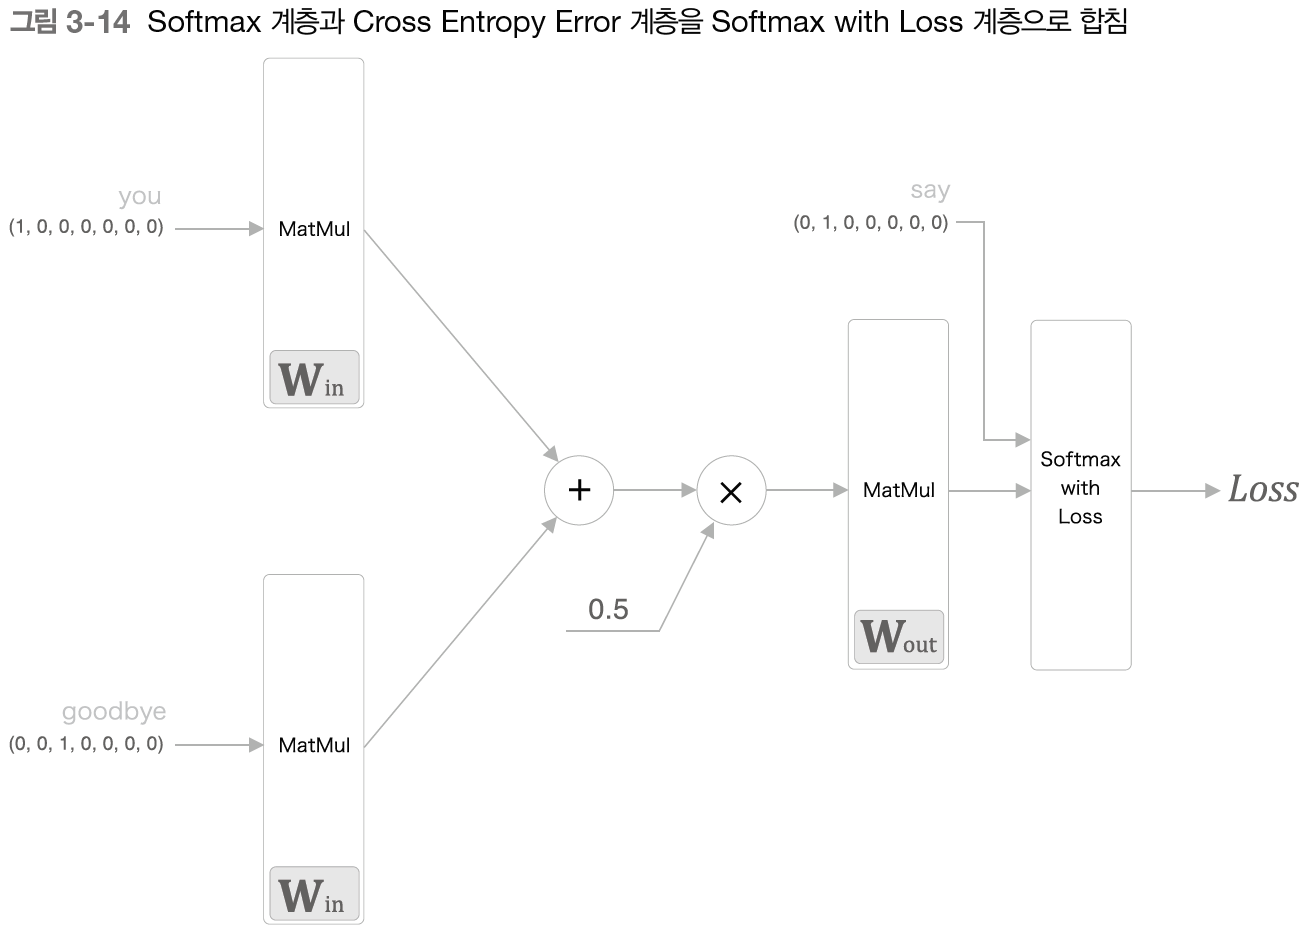

In [6]:
from IPython.display import Image
Image('./image/softmax.png', width=800)

# 3.2.3 word2vec의 가중치와 분산 표현
word2vec에 사용되는 신경망에는 두 가지 가중치(W_in)가 있다.
입력 측 가중치 W_in의 각 행이 각 단어의 분산 표현에 해당하며, 출력층 가중치 W_out에도 단어의 의미가 인코딩된 벡터가 저장되어 있다고 생각할 수 있다. 다만, 출력층 가중치는 각 단어의 분산 표현이 열 방향(수직 방향)으로 저장된다.

최종적으로 이용하는 단어의 분산 표현으로는 어느 쪽 가중치를 선택하면 좋을까? 선택지는 3개이다.

A_ 입력 측 가중치만 이용

B_ 출력 측 가중치만 이용

C_ 양쪽 가중치를 모두 이용(조합)

word2vec 모델 에서는 A안의 입력 측 가중치만 이용한다가 가장 대중적인 선택이다. 우리도 W_in을 단어의 분산 표현으로 이용한다.

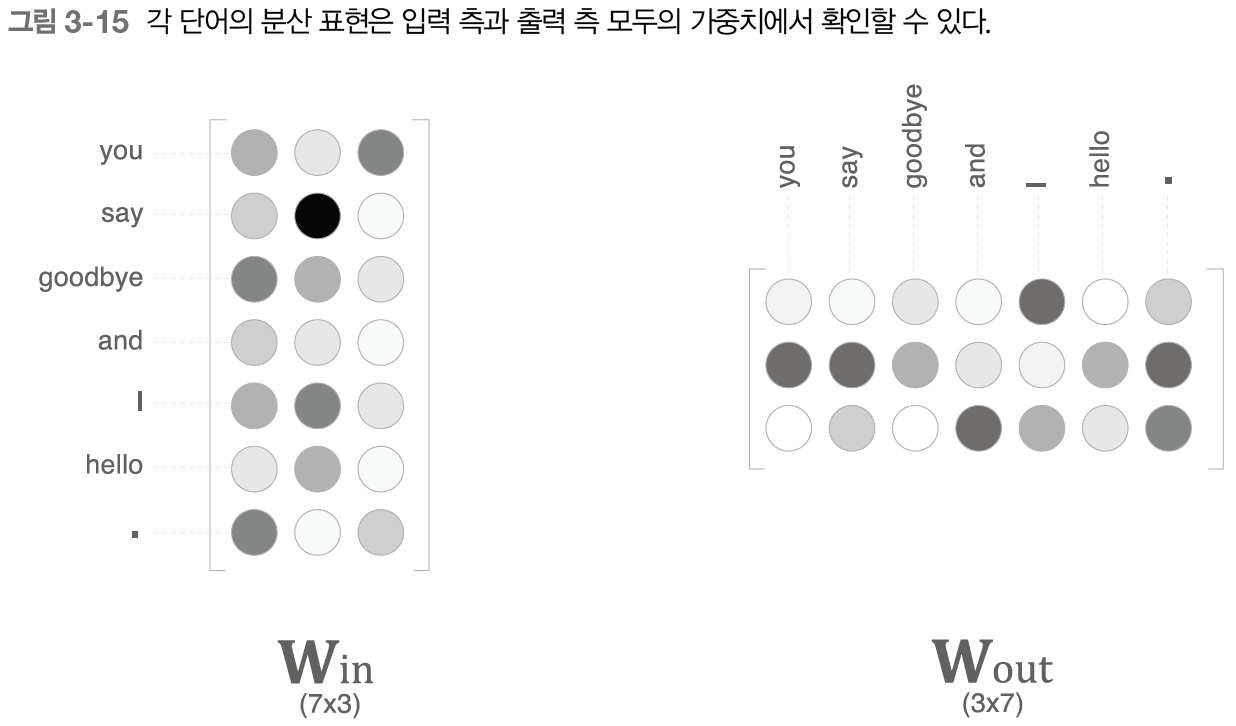

In [7]:
from IPython.display import Image
Image('./image/word.png', width=600)

# 3.3 학습 데이터 준비
## 3.3.1 맥락과 타깃
신경망의 입력 : "맥락", 정답 레이블 : "타깃"(맥락에 둘러싸인 중앙의 단어)

다시 말해 우리가 해야 할 일은 신경망에 "맥락"을 입력했을 때, "타깃"이 출현할 확률을 높이는 것

말뭉치로부터 목표로 하는 단어를 "타깃"으로, 그 주변 단어를 "맥락"으로 뽑아낸다. 이 작업을 말뭉치 안의 (양끝 단어를 제외한) 모든 단어에 대해 수행한다. 이 맥락이 각 행의 신경망의 입력으로 쓰이고, 타깃의 각 행이 정답 레이블(예측해야 하는 단어)가 된다. 참고로, 각 샘플 데이터에서 맥락의 수는 여러 개가 될 수 있으나, 타깃은 오직 하나뿐이다.

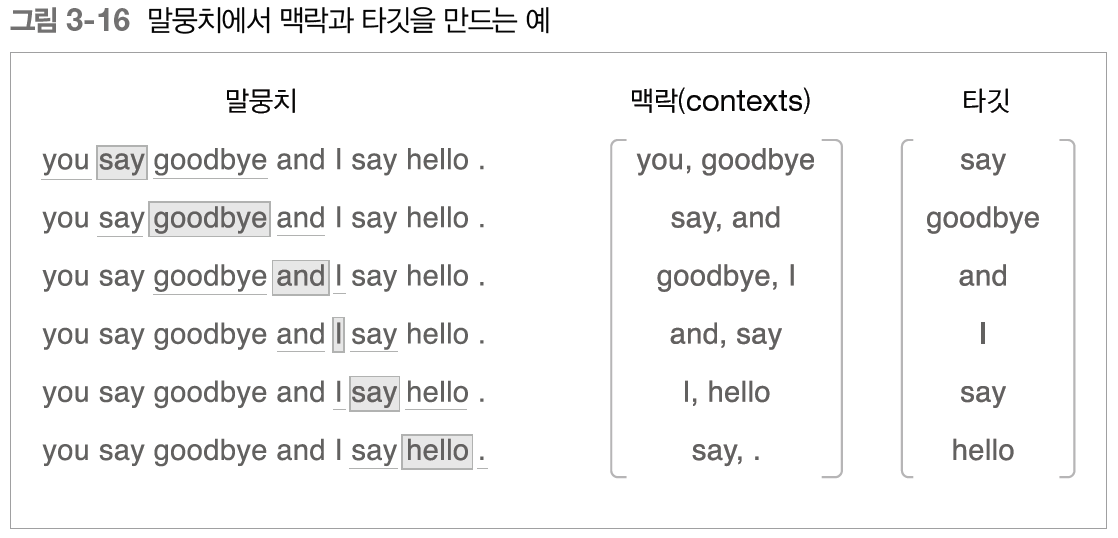

In [8]:
from IPython.display import Image
Image('./image/im4.png', width=800)

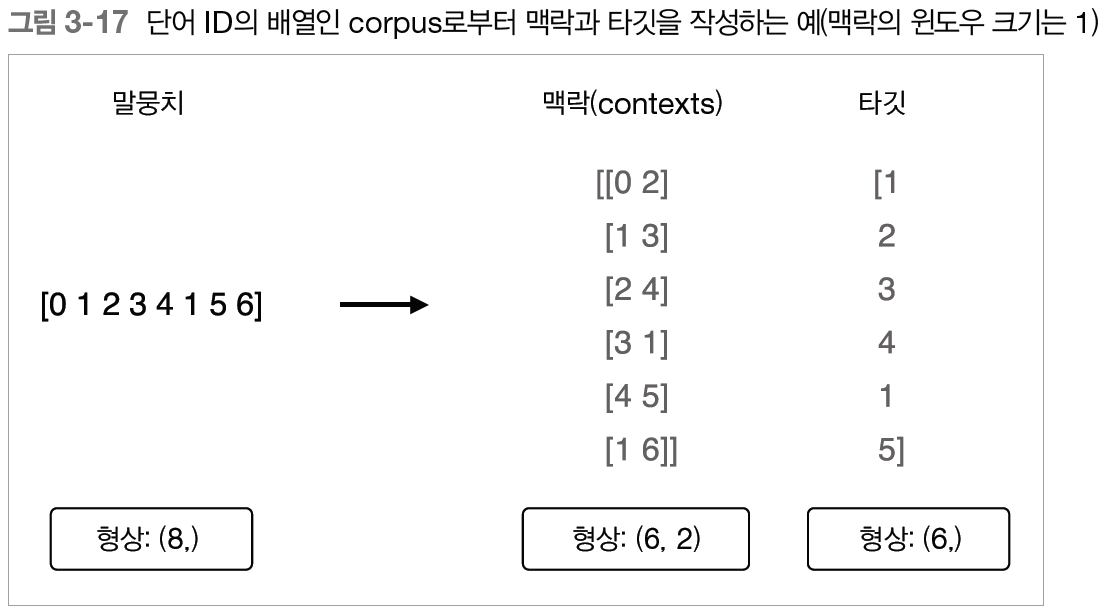

In [31]:
from IPython.display import Image
Image('./image/im5.png', width=800)

In [30]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [43]:
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size] 
    #타겟은 맥락 측정이 가능한 값들(즉 window 사이즈만큼 앞,뒤 단어는 제외. 앞 단어들은 왼쪽 맥락이 / 뒷 단어들은 오른쪽 맥락이 없으므로
    contexts = []
    
    for idx in range(window_size, len(corpus)-window_size):
        #이 경우 len(corpus)=8, window=1 이므로 range(1,7) -> 1, 2, 3, 4, 5, 6번 단어에 대해 맥락 찾기를 실행
        #즉 윗 줄 [window_size : -window_size] 랑 같은 행동을 한 것
        cs = []
        for t in range(-window_size, window_size+1): 
            #window = 1 -> range(-1, 2) = -1, 0, 1 / window = 2 -> range(-2,-1,0,1,2,3) = -2,-1,0,1,2
            # 즉 window 사이즈만큼 타겟 앞 뒤로 이동하려는 속셈
            if t ==0 : #0인 경우 자기 자신이므로 계산 X
                continue
            cs.append(corpus[idx+t]) #문맥을 더하기
        contexts.append(cs) #한 단어마다 이를 반복적으로 수행!
        
    return np.array(contexts), np.array(target)

In [46]:
# 이해를 돕기 위해
print(corpus)
print(corpus[1:-1]) #맨 앞 뒤 단어 삭제(윈도우=1)
print(corpus[2:-2]) #앞 뒤 단어 2개씩 삭제(윈도우=2)

[0 1 2 3 4 1 5 6]
[1 2 3 4 1 5]
[2 3 4 1]


In [33]:
contexts, target = create_contexts_target(corpus, window_size=1)

print(contexts)

print(target)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


맥락과 타깃의 각 원소가 단어 ID이므로 이어서 원핫 표현으로 변환해보자!

## 3.3.2 원핫 표현으로 변환

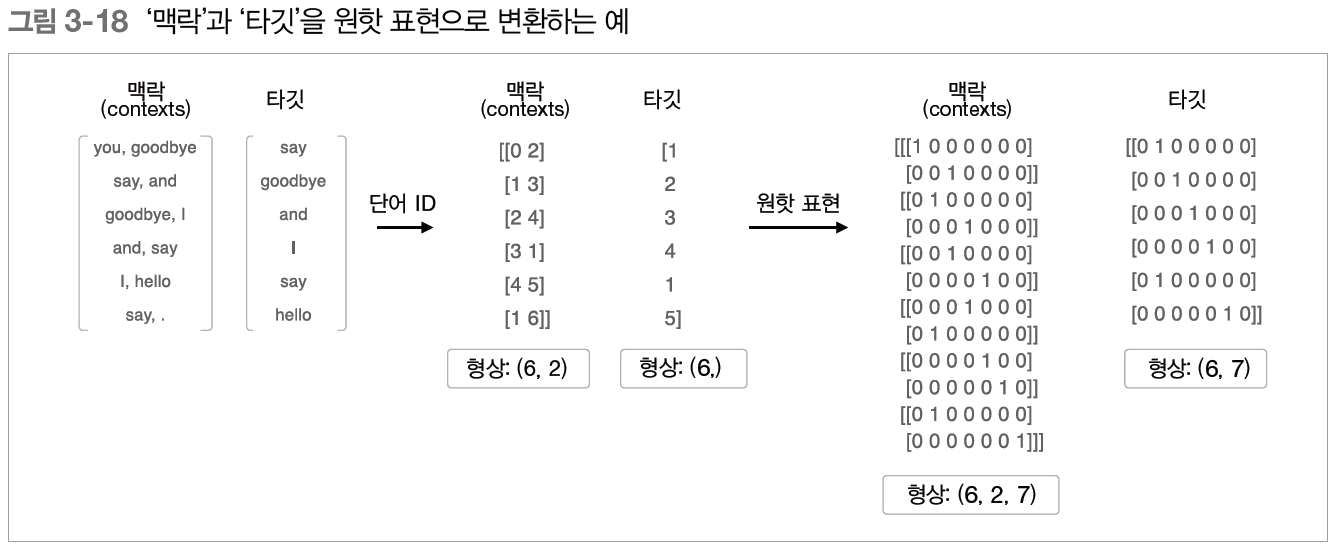

In [47]:
from IPython.display import Image
Image('./image/onehot.png', width=800)

다차원 배열의 형상에 주목하자.

단어 ID를 이용했을 때 맥락의 형상은 (6,2)인데 이를 원핫 표현으로 변환하면 (6,2,7)이 된다.

원핫 표현으로의 변환은 책이 제공하는 convert_one_hot() 함수를 이용한다. (인수는 단어 ID 목록과 어휘 수)

이상으로 학습 데이터 준비를 마쳤다.

In [60]:

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus, window_size=1)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

# 3.4 CBOW 모델 구현


In [105]:
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        #가중치 초기화
        W_in = 0.01 * np.random.randn(V,H).astype('f') #행렬 크기 지정, 데이터 타입은 32비트 부동소수점 수
        W_out = 0.01 * np.random.randn(H,V).astype('f')
        
        #계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        #입력층의 맥락을 처리하는 MatMul 계층은 맥락에서 사용하는 단어의 수 만큼 만들어야 한다.
        
        #모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params +=layer.params
            self.grads += layer.grads
        
        #인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

In [63]:
def forward(self, contexts, target):
    h0 = self.in_layer0.forward(contexts[:, 0]) 
    #contexts의 형상은 미니배치의 수 x 윈도우 크기 x 원핫벡터 예) (6,2,7)
    #target의 형상은 2차원. 예컨대 (6,7) 과 같은 형상
    h1 = self.in_layer1.forward(contexts[:, 1])
    h = (h0+h1)*0.5
    score = self.out_layer.forward(h)
    loss = self.loss_layer.forward(score, target)
    return loss

def backword(self, dout=1):
    ds = self.loss_layer.backward(dout)
    da = self.out_layer.backward(ds)
    da *= 0.5
    self.in_layer1.backward(da)
    self.in_layer0.backward(da)
    return None

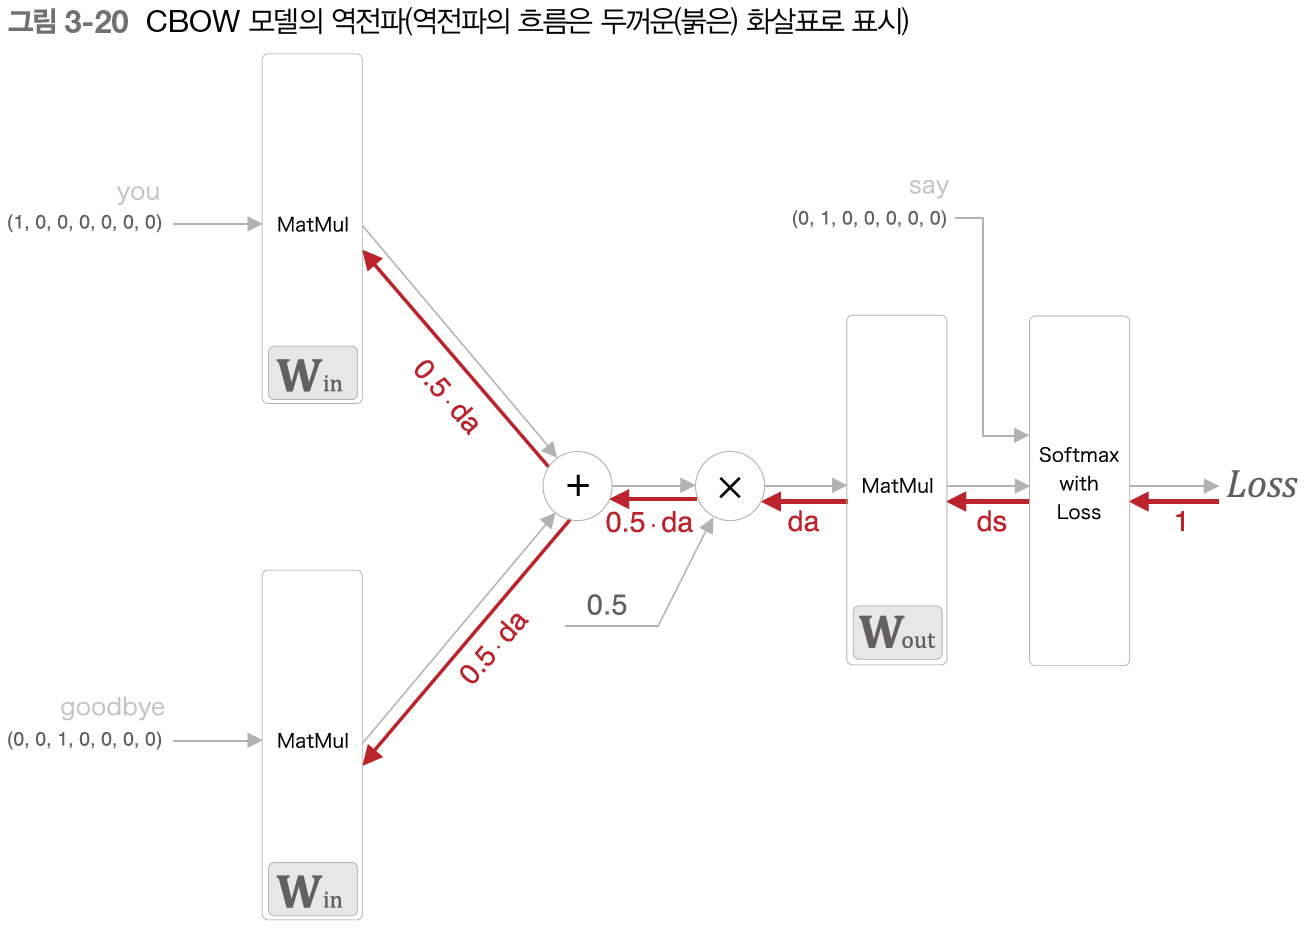

In [113]:
from IPython.display import Image
Image('./image/cbow3.png', width=700)

In [112]:
a = np.random.randn(6,3,8)
b = a[:, 0]
b.shape

(6, 8)

In [119]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy
import time
import matplotlib.pyplot as plt
from common.np import *  # import numpy as np


class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            # 뒤섞기
            idx = numpy.random.permutation(numpy.arange(data_size))
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                batch_x = x[iters*batch_size:(iters+1)*batch_size]
                batch_t = t[iters*batch_size:(iters+1)*batch_size]

                # 기울기 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 손실 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

In [122]:
# ch03/train.py
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.optimizer import Adam


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

TypeError: object of type 'NoneType' has no len()

# 3.5 word2vec 보충
## 3.5.1 CBOW 모델과 확률
## 3.5.2 skip-gram 모델


마저 채워야 합니다...